<center>
    course: <b>Data Analytics with Statistics</b> | lecturer: <b>Prof. Dr. Jan Kirenz</b> | Date: <b>29.12.2023</b>  | Name: <b>Julian Erath, Furkan Saygin, Sofie Pischl</b> | Group: <b> Group B</b> 
</center>

# Final Report
# Weather Data Analysis: A Regression and Classification Approach on the ERA5 Dataset
---

Group name:  Group iBm

---

### Attempt 1:

**1. Introduction and Data**

Weather, an age-old Earth phenomenon, captivates human interest due to its intricate blend of temperature, wind, and precipitation, molding our surroundings and challenging our understanding of the natural world [^1]. Technological advancements now allow for a more profound exploration of these processes [^2]. Accurate weather prediction is crucial for agriculture, disaster management, and urban planning, particularly in the context of climate change risks [^3]. The project, titled "Weather Data Analysis: A Regression and Classification Approach on the ERA5 Dataset," aims to contribute to this exploration by examining how different variables interact to create complex weather phenomena.

The study leverages the ERA5, a high-quality global atmospheric reanalysis dataset covering multiple decades [^4]. Focusing on the region of Bancroft in Ontario, Canada, the project explores the unique climatic and meteorological characteristics of the area, influenced by the 'lake-effect' phenomenon [^6]. This provides an excellent case study for analyzing relationships among different atmospheric elements [^7]. The evaluation is limited to the years 2015 to 2022 to capture the latest climate developments.

**1.2 Data**

The ERA5 dataset, sourced from the European Centre for Medium-Range Weather Forecasts (ECMWF), spans multiple decades (2015-2022) at hourly intervals with a spatial resolution of approximately 31 km. Various meteorological parameters are included, such as temperature, precipitation, wind speed, and atmospheric pressure [^10].

In [92]:
# import dependencies 
import pandas as pd
import numpy as np
import datetime
import math
import matplotlib.pyplot as plt
from matplotlib import rcParams
import matplotlib.gridspec as gridspec
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")

#import data
df_full = pd.read_csv("../data/external/feature_data_substation_bancroft_labelled.csv")
df_full.head(3)

,Unnamed: 0,substation,run_datetime,valid_datetime,horizon,avg_temp,avg_windspd,avg_windgust,avg_pressure_change,avg_snow,...,MA_avg_winddir_month,MA_avg_temp_change_month,label0,label1,label2,label3,wep,storm_id2,year,month
0,0,Bancroft,2015-07-15 00:00:00,2015-07-15 00:00:00,0.0,287.389224,3.386380,11.136197,52.892217,0.0,...,80.302464,NaN,0,1,NaN,1,Blue sky day,NaN,2015,7
1,1,Bancroft,2015-07-15 01:00:00,2015-07-15 01:00:00,0.0,287.378997,3.326687,11.002795,50.256685,0.0,...,78.584418,-0.010227,0,1,NaN,1,Blue sky day,NaN,2015,7
2,2,Bancroft,2015-07-15 02:00:00,2015-07-15 02:00:00,0.0,287.388845,3.243494,10.700595,47.944054,0.0,...,77.809235,-0.000189,3,1,NaN,1,Blue sky day,NaN,2015,7


**1.3 Research Questions**

*Regression Analysis:*
1. Is it possible to accurately predict temperature based on historical data?
2. Can a correlation between temperature and wind features be identified using regression techniques?
3. How does incorporating multiple atmospheric predictors enhance the accuracy of temperature prediction?

*Classification Analysis:*
1. Can extreme weather events be classified and predicted based on multivariate weather data?
2. Is it possible to categorize and predict different extreme weather events using multiclass classification algorithms?

**1.4 Exploratory Data Analysis (EDA)**
First, the variable "avg_temp" is examined. This includes depicting the temperature trend over time, as well as displaying the box plot and histogram.
Next, the occurrences of weather events and their corresponding box plots are shown.

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 4))

# Plot 1: Line plot for average temperature over time
sns.lineplot(x='run_datetime', y='avg_temp', data=df_full, ax=axes[0])
axes[0].set_title('Average Temperature Over Time')
axes[0].set_xlabel('Time')
axes[0].set_ylabel('Average Temperature')

# Plot 2: Boxplot for average temperature
sns.boxplot(x='avg_temp', data=df_full, ax=axes[1])
axes[1].set_title('Boxplot for Average Temperature')
axes[1].set_xlabel('Average Temperature')

# Plot 3: Histogram for average temperature with median line
sns.histplot(x='avg_temp', data=df_full, kde=True, ax=axes[2])
axes[2].axvline(x=df_full['avg_temp'].median(), color='red', linestyle='--', label='Median')
axes[2].set_title('Histogram with Median for Average Temperature')
axes[2].set_xlabel('Average Temperature')
axes[2].legend()

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()

In [ ]:
Next, the occurrences of weather events and their corresponding box plots are shown.

In [ ]:
fig = plt.figure(figsize=(25, 10))
gs = gridspec.GridSpec(1, 2, width_ratios=[4, 9])

# Plot 1: Distribution of All Weather Events
ax0 = plt.subplot(gs[0])
ax0.set_title('Distribution of All Weather Events', fontsize=20)

df_full['display_label'] = df_full.apply(lambda row: f"{row['wep']}: '{row['label0']}'" if row['wep'] == 'Blue sky day' else row['wep'], axis=1)
weather_counts = df_full['display_label'].value_counts()
explode_events = set(df_full[df_full['wep'] != 'Blue sky day']['wep'].value_counts().index)
explode = [0.1 if event in explode_events else 0 for event in weather_counts.index]
total_samples = len(df_full)
grouped_labels = [label if weather_counts[label] > weather_counts.quantile(0.5) else 'Other' for label in weather_counts.index]
patches, _, _ = ax0.pie(weather_counts, labels=None, autopct=lambda p: f'{p:.1f}%\n({int(p/100*total_samples)})', startangle=90, explode=explode)
ax0.set_xlabel(f'Total Number of Observations: {total_samples}', fontsize=20)
ax0.axis('equal') 


# Plot 2: Box Plot for Single Feature
ax1 = plt.subplot(gs[1])
ax1.set_title('Box Plot for Average Temperature', fontsize=20)

def plot_single_feature_boxplot(df, label_col, feature, ax):
    unique_labels = df[label_col].unique()
    palette = sns.color_palette()
    label_colors = dict(zip(unique_labels, palette))
    sns.boxplot(x=df[label_col], y=df[feature], ax=ax, palette=label_colors)
    ax.set_ylabel(feature, fontsize=20)
    ax.set_xlabel('')
    ax.set_xticklabels([])  
    handles = [plt.Line2D([0], [0], color=label_colors[label], marker='o', linestyle='', markersize=10) for label in unique_labels]
    ax.legend(handles, unique_labels, loc='upper center', bbox_to_anchor=(0.5, -0.1), fancybox=True, shadow=True, ncol=len(unique_labels),fontsize=20)
    plt.tight_layout()

plot_single_feature_boxplot(data, 'wep', 'avg_temp', ax1)

# Adjust layout 
plt.subplots_adjust(left=0.5, right=1.5, wspace=0.5)  
plt.show()

----
## Attempt 2:

## 1. Introduction and data

### 1.1 Motivation

Weather, a phenomenon as old as Earth itself, has long been a subject of human fascination. The complex interplay of temperature, wind, and precipitation shapes our environment, affects our lives, and challenges our understanding of the natural world [^1]. With the advent of technology and data analysis techniques, a deeper exploration of these complex processes is now possible. [^2].  As discussed in a systematic review titled "The contribution of weather forecast information to agriculture, water, and energy sectors in East and West Africa," accurate weather prediction is crucial for effective agriculture, disaster management, and urban planning, particularly in the context of climate change risks[^3]. The project, titled "Weather Data Analysis: A Regression and Classification Approach on the ERA5 Dataset", aims to contribute to this ongoing exploration by examining how different variables interact to create complex weather phenomena.

This project leverages the ERA5, which is a high-quality global atmospheric reanalysis dataset covering multiple decades [^4]. This data, examined for its comprehensiveness in the "Evaluation of spatial-temporal variation performance of ERA5 precipitation data in China," is a example for researchers seeking to understand weather patterns and atmospheric dynamics[^5].  The analysis will focus on the region of Bancroft in Ontario, Canada.  The geographic location of Bancroft can be seen under "../references/images/complete_map.png". This decision is rooted in the unique climatic and meteorological characteristics of the region, which offer a distinctive case study for understanding complex weather phenomena. The geographical and climatic characteristics of Bancroft are strongly influenced by the so called 'lake-effect', which is a phenomenon where cold winds moving over warmer lake waters and leads to significant changes in weather patterns nearby[^6]. This  creates an excellent case study for analyzing the relationships among different atmospheric elements, which also leads to interest in that area by IBM and IBM clients [^7]. The work presented is limited to the evaluation of the years 2015 to 2022 in order to include only the current and latest climate developments. 
Focusing on Bancroft enables a targeted application of regression and classification techniques, facilitating a detailed analysis of localized weather patterns and their impacts [^8], [^9].

Weather, an ancient Earth phenomenon, captivates human interest due to its intricate blend of temperature, wind, and precipitation, molding our surroundings and challenging our understanding of the natural world [^1]. Technological advancements now allow for a more profound exploration of these processes [^2]. In the context of climate change risks, accurate weather prediction is pivotal for agriculture, disaster management, and urban planning [^3]. The project, titled "Weather Data Analysis: A Regression and Classification Approach on the ERA5 Dataset," contributes to this exploration by investigating the interaction of variables in shaping complex weather phenomena.

Utilizing the ERA5, a high-quality global atmospheric reanalysis dataset spanning decades [^4], the analysis centers on Bancroft in Ontario, Canada, known for its unique climatic features influenced by the 'lake-effect' phenomenon [^6]. This makes Bancroft an ideal case study for understanding relationships among atmospheric elements, drawing interest from IBM and its clients [^7]. The study focuses on the years 2015 to 2022 to capture the latest climate developments, employing regression and classification techniques for a targeted analysis of localized weather patterns and their impacts [^8], [^9].

### 1.2 Data

**Data description of sample**
The ERA5 dataset, sourced from the European Centre for Medium-Range Weather Forecasts (ECMWF), is comprised of atmospheric reanalysis data spanning multiple decades (2015-2022) at hourly intervals and characterized by a spatial resolution of approximately 31 km. Various meteorological parameters such as temperature, precipitation, wind speed, and atmospheric pressure, grouped by average, minimum, and maximum values for the observed hour, are included in the dataset. The data, labeled by meteorologists and data scientists from IBM and The Weather Company, offers comprehensive global-scale atmospheric information, with each observation representing a set of meteorological parameters at a specific location and time. Recognized for its high quality and precision, the ERA5 dataset's enhanced spatial and temporal resolution makes it well-suited for detailed analyses and modeling across diverse applications, including climate research, environmental monitoring, and weather forecasting [^10].

**Variables**
The dataset, crucial for this analysis, encompasses key variables such as air temperature, wind speed and direction, precipitation (rainfall and snowfall), atmospheric pressure, snow density, cumulative snow, cumulative ice, and weather events. Temperature is measured in Kelvin, while wind information includes zonal and meridional components. Precipitation data is essential for hydrology and agriculture, and atmospheric pressure variations are associated with weather patterns. The dataset also includes categorical weather events such as Blue Sky Day, Mild Snowfall, and Storm with Freezing Rain. These variables form the foundation for the assignment's comprehensive analysis [^11].

**Overview of data**
Initially, the .csv file is loaded, and the data's head is printed for an initial overview of columns (variables) and rows (observations). The dataset comprises 65,345 observations and 184 columns, including unique predictor variables and a response variable. Identifier variables like "Unnamed: 0" are identified and dropped due to redundancy, while 'run_datetime' and 'valid_datetime' are transformed into datetime format. A new column, 'avg_temp_celsius,' is created by converting temperatures from Kelvin to Celsius. Wind directions in 'avg_winddir' are then categorized into cardinal directions using a function, resulting in the 'wind_direction_label' column. Subsequently, a new dataframe is formed by selecting specific columns for optimized resource usage. This dataframe is later split into training, testing, and validation sets, underlining the foundational role of proper data splitting for reliable machine learning model development and generalization to new data [^12][^13].

In [2]:
# import dependencies 
import pandas as pd
import numpy as np
import datetime
import math
import matplotlib.pyplot as plt
from matplotlib import rcParams
import matplotlib.gridspec as gridspec
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")

#import data
df_full = pd.read_csv("../data/external/feature_data_substation_bancroft_labelled.csv")
df_full.head()

,Unnamed: 0,substation,run_datetime,valid_datetime,horizon,avg_temp,avg_windspd,avg_windgust,avg_pressure_change,avg_snow,...,MA_avg_winddir_month,MA_avg_temp_change_month,label0,label1,label2,label3,wep,storm_id2,year,month
0,0,Bancroft,2015-07-15 00:00:00,2015-07-15 00:00:00,0.0,287.389224,3.386380,11.136197,52.892217,0.0,...,80.302464,NaN,0,1,NaN,1,Blue sky day,NaN,2015,7
1,1,Bancroft,2015-07-15 01:00:00,2015-07-15 01:00:00,0.0,287.378997,3.326687,11.002795,50.256685,0.0,...,78.584418,-0.010227,0,1,NaN,1,Blue sky day,NaN,2015,7
2,2,Bancroft,2015-07-15 02:00:00,2015-07-15 02:00:00,0.0,287.388845,3.243494,10.700595,47.944054,0.0,...,77.809235,-0.000189,3,1,NaN,1,Blue sky day,NaN,2015,7
3,3,Bancroft,2015-07-15 03:00:00,2015-07-15 03:00:00,0.0,287.427324,3.145505,10.323983,45.855264,0.0,...,77.931830,0.012700,2,1,NaN,1,Blue sky day,NaN,2015,7
4,4,Bancroft,2015-07-15 04:00:00,2015-07-15 04:00:00,0.0,287.489158,3.047607,9.921157,44.823453,0.0,...,79.272034,0.024983,2,1,NaN,1,Blue sky day,NaN,2015,7


In [3]:
# Change datetime columns to datetime format
df_full['run_datetime'] = pd.to_datetime(df_full['run_datetime'])
df_full['valid_datetime'] = pd.to_datetime(df_full['valid_datetime'])

# Add temperature column for degree in celsius
df_full['avg_temp_celsius'] = df_full['avg_temp'] - 273.15

# Translate wind directions into cardinal directions
def wind_direction_label(degrees):
    if 22.5 < degrees <= 67.5:
        return 'Northeast'
    elif 67.5 < degrees <= 112.5:
        return 'East'
    elif 112.5 < degrees <= 157.5:
        return 'Southeast'
    elif 157.5 < degrees <= 202.5:
        return 'South'
    elif 202.5 < degrees <= 247.5:
        return 'Southwest'
    elif 247.5 < degrees <= 292.5:
        return 'West'
    elif 292.5 < degrees <= 337.5:
        return 'Northwest'
    else:
        return 'North'
    
df_full['wind_direction_label'] = df_full['avg_winddir'].apply(wind_direction_label)

### 1.3 Research Questions

**Regression Analysis:**  
Is it possible to accurately predict the temperature and its relationship with wind characteristics using historical data? This question is inspired by the current understanding of atmospheric variables and their interactions and specified as follows:  

*1. Temperature Prediction:* Is it possible to build an accurate regression model to predict temperature based on historical data?   
*2. Temperature and Wind Modeling:* Is it possible to find a correlation or causation between the temperature and the wind features windspeed, windgust or winddirection using regression techniques?   
*3. Multivariate Temperature Prediction / Linear Regression of Temperature with Multiple Predictors:* How does the incorporation of multiple atmospheric predictors, such as windspeed, windgust, winddirection, air pressure, snow and ice parameters enhance the accuracy of temperature prediction compared to a model solely based on windspeed?   
*4. Extreme Weather Event Prediction by Temperature in Logistic Regression:* Can logistic regression effectively classify and predict the occurrence of extreme or normal weather events based on temperature (or alternatively windspeed) ranges?   

*Regression Hypothesis:* There exists a significant correlation between temperature and wind characteristics, which can be modeled to predict future temperature trends and variations. This hypothesis is based on the premise that atmospheric variables are interconnected and can be analyzed to forecast weather conditions.


**Classification Analysis:**  
Can effective classification and prediction of weather events, including extreme occurrences, be achieved based on multivariate weather data? This aspect of the research aims to develop methods for accurate prediction of weather events, acknowledging the complexity and variability of weather patterns and is specified as follows:

*1. Extreme Weather Events in Binary Classification:* Is it possible to classify and predict extreme weather events such as storms? This involves training a binary classification model to identify patterns indicative of extreme events. The result of this classification analysis is the prediction of extreme weather events based on the current weather data and a model that was trained on historical weather data. 
*2. Weather Event and Pattern Classification in Multiclass Classification:* Is it possible to categorize and predict different extreme weather events based on multivariate weather data? This involves using multiclass classification algorithms. The results of this classification analysis is the prediction of certain weather events based on the current weather data and a model that was trained on historical weather data.
 temperature trends and variations. This hypothesis is based on the premise that atmospheric variables are interconnected and can be analyzed to forecast weather conditions.

* Classification Hypthesis:* Specific patterns in the weather data can accurately predict various weather events, including extreme conditions. This hypothesis is informed by the need for effective prediction models in the face of increasingly frequent and severe weather events.

## 1.4 Exploratory Data Analysis (EDA)

First, the variable "avg_temp" is examined. This includes depicting the temperature trend over time, as well as displaying the box plot and histogram.
Next, the occurrences of weather events and their corresponding box plots are shown.

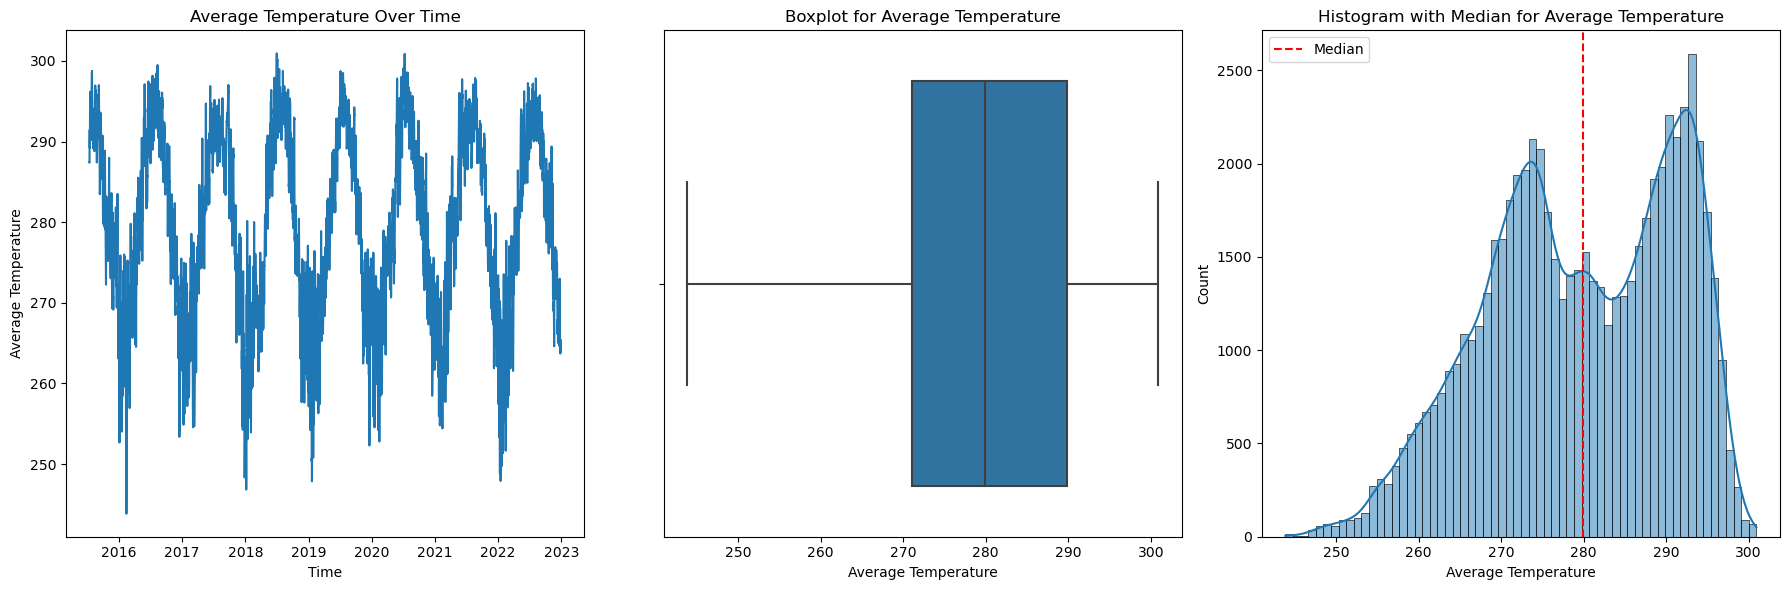

In [7]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 4))

# Plot 1: Line plot for average temperature over time
sns.lineplot(x='run_datetime', y='avg_temp', data=df_full, ax=axes[0])
axes[0].set_title('Average Temperature Over Time')
axes[0].set_xlabel('Time')
axes[0].set_ylabel('Average Temperature')

# Plot 2: Boxplot for average temperature
sns.boxplot(x='avg_temp', data=df_full, ax=axes[1])
axes[1].set_title('Boxplot for Average Temperature')
axes[1].set_xlabel('Average Temperature')

# Plot 3: Histogram for average temperature with median line
sns.histplot(x='avg_temp', data=df_full, kde=True, ax=axes[2])
axes[2].axvline(x=df_full['avg_temp'].median(), color='red', linestyle='--', label='Median')
axes[2].set_title('Histogram with Median for Average Temperature')
axes[2].set_xlabel('Average Temperature')
axes[2].legend()

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()

Next, the occurrences of weather events and their corresponding box plots are shown.

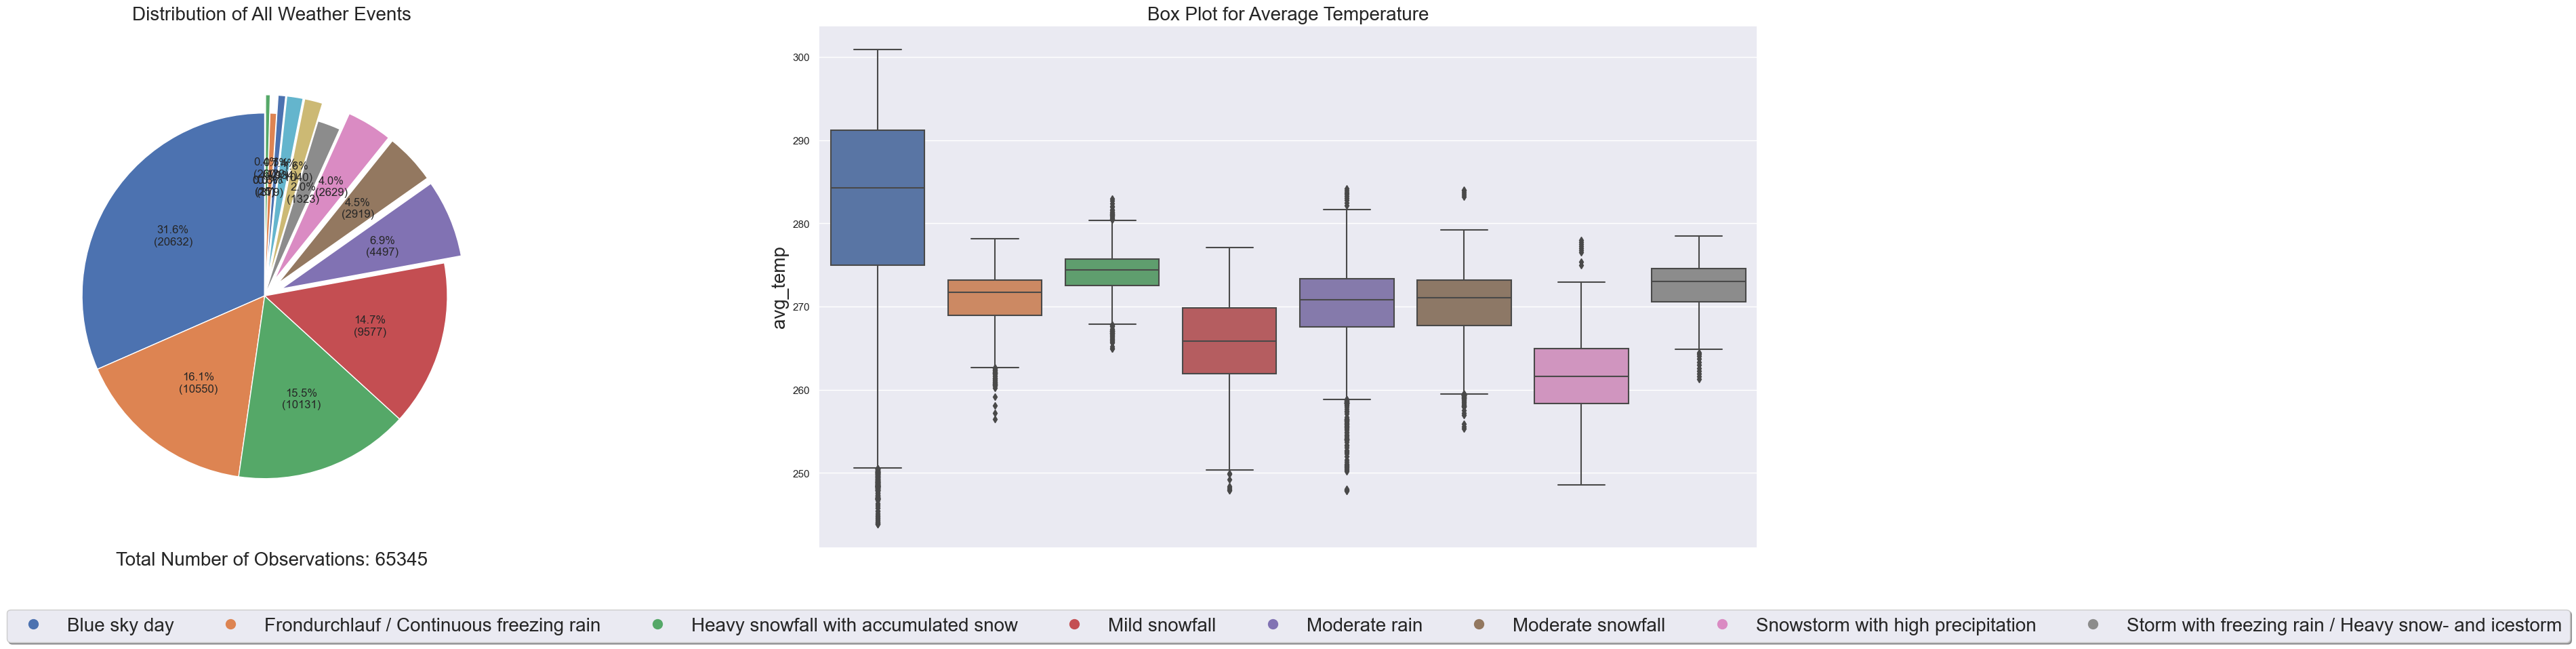

In [90]:
fig = plt.figure(figsize=(25, 10))
gs = gridspec.GridSpec(1, 2, width_ratios=[4, 9])

# Plot 1: Distribution of All Weather Events
ax0 = plt.subplot(gs[0])
ax0.set_title('Distribution of All Weather Events', fontsize=20)

df_full['display_label'] = df_full.apply(lambda row: f"{row['wep']}: '{row['label0']}'" if row['wep'] == 'Blue sky day' else row['wep'], axis=1)
weather_counts = df_full['display_label'].value_counts()
explode_events = set(df_full[df_full['wep'] != 'Blue sky day']['wep'].value_counts().index)
explode = [0.1 if event in explode_events else 0 for event in weather_counts.index]
total_samples = len(df_full)
grouped_labels = [label if weather_counts[label] > weather_counts.quantile(0.5) else 'Other' for label in weather_counts.index]
patches, _, _ = ax0.pie(weather_counts, labels=None, autopct=lambda p: f'{p:.1f}%\n({int(p/100*total_samples)})', startangle=90, explode=explode)
ax0.set_xlabel(f'Total Number of Observations: {total_samples}', fontsize=20)
ax0.axis('equal') 


# Plot 2: Box Plot for Single Feature
ax1 = plt.subplot(gs[1])
ax1.set_title('Box Plot for Average Temperature', fontsize=20)

def plot_single_feature_boxplot(df, label_col, feature, ax):
    unique_labels = df[label_col].unique()
    palette = sns.color_palette()
    label_colors = dict(zip(unique_labels, palette))
    sns.boxplot(x=df[label_col], y=df[feature], ax=ax, palette=label_colors)
    ax.set_ylabel(feature, fontsize=20)
    ax.set_xlabel('')
    ax.set_xticklabels([])  
    handles = [plt.Line2D([0], [0], color=label_colors[label], marker='o', linestyle='', markersize=10) for label in unique_labels]
    ax.legend(handles, unique_labels, loc='upper center', bbox_to_anchor=(0.5, -0.1), fancybox=True, shadow=True, ncol=len(unique_labels),fontsize=20)
    plt.tight_layout()

plot_single_feature_boxplot(data, 'wep', 'avg_temp', ax1)

# Adjust layout 
plt.subplots_adjust(left=0.5, right=1.5, wspace=0.5)  
plt.show()

[^1]: Liljequist, G.H. / Cehak, K. (1984): Allgemeine Meteorologie. 3. Auflage, Springer-Verlag.  
[^2]: Fathi, M. / Haghi Kashani, M. / Jameii, S. M. / Mahdipour, E. (2022): Big Data Analytics in Weather Forecasting: A Systematic Review, in: Archives of Computational Methods in Engineering 29.2 (2022, Springer): 1247–1275  
[^3]: [The contribution of weather forecast information to agriculture, water, and energy sectors in East and West Africa](https://www.frontiersin.org/articles/10.3389/fenvs.2022.935696/full)  
[^4]: ECMWF (2023a): ERA5: data documentation. URL: https://confluence.ecmwf.int/display/CKB/ERA5%3A+data+documentation  
[^5]: [Evaluation of spatial-temporal variation performance of ERA5 precipitation data in China](https://www.nature.com/articles/s41598-021-97432-y)  
[^6]: [A Hybrid Dataset of Historical Cool-Season Lake Effects From the Eastern Great Lakes of North America](https://www.frontiersin.org/journals/water/articles/10.3389/frwa.2022.788493/full)   
[^7]: Hjelmfelt, M.R. (1990): Numerical study of the influence of environmental conditions on lake-effect snowstorms over Lake Michigan, in: Monthly Weather Review, 118(1), pp.138-150.  
[^8]: Ghirardelli, J.E. (2005): An Overview of the Redeveloped Localized Aviation Mos Program (Lamp) For Short-Range Forecasting.     
[^9]: de Lima, Glauston, R.T. / Stephan, S. (2013): A new classification approach for detecting severe weather patterns, in: Computers & geosciences 57 (2013): 158-165.  
[^10]: ECMWF (2023a): ERA5: data documentation. URL: https://confluence.ecmwf.int/display/CKB/ERA5%3A+data+documentation
[^11]: ECMWF (2023c): ERA5: data documentation parameterlistings. URL: https://confluence.ecmwf.int/display/CKB/ERA5%3A+data+documentation#ERA5:datadocumentation-Parameterlistings
[^12]: Scikit-learn (2023a): https://scikit-learn.org/stable/documentation.html  
[^13]: Hastie, T., Tibshirani, R., & Friedman, J. (2009). The Elements of Statistical Learning.

## Methodology

## Results

> REMOVE THE FOLLOWING TEXT

This is where you will output the final model with any relevant model fit statistics.

Describe the key results from the model.
The goal is not to interpret every single variable in the model but rather to show that you are proficient in using the model output to address the research questions, using the interpretations to support your conclusions.

Focus on the variables that help you answer the research question and that provide relevant context for the reader.


### Regression Analysis 
Is there a significant correlation between temperature and wind characteristics, which can be modeled to predict future temperature trends and variations? This question was addressed within the scope of this project. Various regression techniques were employed, and different sub-questions were examined

**Temperature and Wind Modeling**
In the first step, he relationship between the wind parameter average wind speed and the average temperature is investigated. In this context, models such as the Linear Regression Model, Gradient Boosting Model, Stochastic Gradient Descent Model, and Support Vector Regression Model are utilized to depict the correlation.
These models predicting average temperature from average wind speed using various regression techniques are compared with each other. Results show weak correlation, high MSE, and MAE across all models, indicating poor prediction. Outliers and dispersed residuals suggest significant deviations. Support Vector Regression tends to underpredict. Findings suggest the need for multiple regression with additional variables. A subsequent linear regression analysis on wind gusts reinforces the idea that correlated variables may yield successful models but lack scientific value. Multiple regressor analysis is proposed to enhance temperature prediction due to the limited effectiveness of wind speed alone.


*Feature Selection*
Before initializing a Linear Regression Modell with Multiple predictors, the best variables are examined. Therefore the variables are checked for multicollinearity in the first step. Multicollinearity exists, if two independent variables exhibit a high degree of correlation. High Correlations indicate a robust relationship, implying that only one of the two variables is necessary for regression analysis. The variables, which do not have a high collinearity are written to a new df (variables: avg_temp, avg_windspd, avg_winddir, avg_winddir_sin, avg_winddir_cos, max_cumulative_precip, max_snow_density_6, max_cumulative_snow, max_cumulative_ice, label1).
Next, a forward and backward selection is beeing made on these variables, but did not yield significant advantages in this study as prior to the commencement of the Bachelor's thesis, a thorough evaluation of variables was conducted based on existing literature and relevant metrics. This meticulous pre-selection process ensured that only essential variables were included in the dataset, aligning with established theoretical foundations and methodological considerations.

**Linear Regression Analysis with Multiple Predictors**
In the initial phase of the Temperature and Wind Modeling over Time  analysis, a Multiple Linear Regression is , as introduced in the lecture.
Based on that, the temperature variable is now predicted with improved accuracy using linear regression with multiple predictor variables, addressing the research question of how the incorporation of various atmospheric predictors enhances temperature prediction over different time scales, uncovering interactions and synergies among predictors and analyzing temporal dynamics to refine the predictive model. The temperature is predicted on windspeed and winddirection in the first step. In the next step the temperature is predicted using the before utilzed variables. After implementing the  Multiple Linear Regression (MLR) model there can a lack of accuracy in predicting average temperature from wind speed and direction, as well as from the ramining variables. The overall conclusion underscores the need for further refinement, potentially involving additional features or non-linear models, to enhance predictive accuracy, especially in accurately predicting extreme temperatures.

**SARIMAX MODEL**
After successfully predicting the temperature parameter through multiple predictor linear regression, the focus shifts to forecasting the temperature parameter with a statistical SARIMAX approach. SARIMAX (Seasonal Autoregressive Integrated Moving-Average with Exogenous Regressors) models are among the most widely used statistical models for forecasting, with excellent forecasting performance [^35]. To keep the model's complexity low and avoid lengthy computation times later on, only wind variables are used for an initial approach here.
The analysis of Trend and Seasonality revealed a slight variability with some periods showing a gentle rise or fall and a consistent and expected cyclical patterns corresponding to the seasons. The augmented Dickey-Fuller Test (ADF), Akaike Information Criterion (AIC) and Bayesian Information Criterion (BIC) are peformed on the data. The ADF Test indicated stationarity, the AIC and BIC showed, that windspeed and winddirection are the most suitable predictors. 
After that, the actual SARIMAX Model is created. The evaluation reveals the model's limitations in capturing short-term fluctuations, particularly missing sharp peaks, and consistently overestimating temperatures, indicating a systematic bias and the need for further refinement or alternative modeling approaches to enhance accuracy.
 

**XGBoost**
After  implementing the SARIMAX as a popular approach for time series analysis, the Lazy Regressor library from sklearn was utilized to find the best performing regressor. The Lazy Regressor showed, that all Regression Models have a rather low R-Squared Value. The XGBost Regressor is determined as the best performing Model wih a R-Squared Value of 0.13. Based on that the XGBoost Model is used. The evaluation of the model shows a moderate level of predictive accuracy, with the model following the general temperature trend but exhibiting discrepancies in magnitude and timing, supported by reported Mean Squared Error (MSE) and Mean Absolute Error (MAE) values, suggesting potential for improvement through model tuning and additional feature exploration.

**Temporal Prediction**
In the next step, the relationship between temperature and time explored. A Linear Regression Model, Gradient Boosting Regressor, a SGD Regressor and a Support Vector Regressor is used here. The Evaluation  of the plots presents, that the he Gradient Boosting Regressor demonstrates a promising ability to closely track temperature changes with fewer deviations and a tighter distribution of residuals, supporting the conclusion that linear regression models, while not perfect, can provide valuable forecasts for temperature trends in Bancroft, Canada.


**Temporal Logistic Regression**
Logistic regression, placed between linear regression and classification chapters, serves as a bridge to better understand the data story, where blue dots represent actual labels, red dots indicate predicted probabilities, and the orange curve reflects the probability of extreme weather events based on temperature alone. The graph reveals significant overlap in temperature ranges for different event types, leading to high false positives and low recall. Consequently, logistic regression with temperature as the sole predictor is deemed insufficient for this classification task, suggesting the potential need for additional predictors, hyperparameter tuning, or alternative modeling approaches for improved performance.

---
Approach 2

**Regression Analysis: Investigating Temperature and Wind Characteristics**

This project aims to determine the correlation between temperature and wind characteristics, exploring the potential for modeling to predict temperature trends. Various regression techniques were applied to address this question, focusing on the relationship between average wind speed and temperature. Models, including Linear Regression, Gradient Boosting, Stochastic Gradient Descent, and Support Vector Regression, were utilized to capture this correlation.

**Feature Selection and Linear Regression with Multiple Predictors**

Before implementing a Linear Regression model with multiple predictors, an in-depth feature selection process was conducted. Variables were examined for multicollinearity, and a meticulous pre-selection ensured only essential variables were included, aligning with theoretical foundations and methodological considerations. The subsequent Multiple Linear Regression analysis revealed the model's limitations in accurately predicting average temperature from wind speed, indicating the need for further refinement, potentially involving additional features or non-linear models.

**SARIMAX Model: Forecasting Temperature Trends**

Following the Linear Regression analysis, a SARIMAX (Seasonal Autoregressive Integrated Moving-Average with Exogenous Regressors) model was implemented for temperature forecasting. The model utilized wind variables for an initial approach to keep complexity low. Despite revealing the model's limitations in capturing short-term fluctuations and consistent overestimation, the SARIMAX model provides insights into the cyclical patterns corresponding to seasons.

**XGBoost Model: Evaluating Predictive Accuracy**

After implementing SARIMAX, the XGBoost model was selected as the best-performing regressor, exhibiting a moderate level of predictive accuracy. The evaluation highlighted discrepancies in magnitude and timing, indicating potential for improvement through model tuning and additional feature exploration.

**Temporal Prediction Analysis: Exploring Temperature and Time Relationship**

In the temporal prediction analysis, the relationship between temperature and time was explored using various regression models. The Gradient Boosting Regressor demonstrated promising ability to closely track temperature changes with fewer deviations, supporting the notion that linear regression models can provide valuable forecasts for temperature trends.

**Temporal Logistic Regression: Bridging Regression and Classification**

Logistic regression was introduced as a bridge between regression and classification, using temperature as the sole predictor to classify extreme weather events. However, the analysis revealed significant overlap in temperature ranges, leading to high false positives and low recall. Logistic regression proved insufficient for this classification task, suggesting the potential need for additional predictors, hyperparameter tuning, or alternative modeling approaches for improved performance.

**Conclusion: Integrating Insights Across Models**

In conclusion, the comprehensive analysis of various regression models, including SARIMAX and XGBoost, provides valuable insights into temperature prediction and forecasting. While each model exhibits strengths and limitations, the overarching theme underscores the complexity of predicting temperature accurately. Further refinement, exploration of additional features, and consideration of alternative modeling approaches are crucial for enhancing predictive accuracy across different time scales and weather conditions.

[^35]: Ortiz, Joaquin Amat Rodrigo and Javier Escobar (n.d.): Forecasting SARIMAX and ARIMA models - Skforecast Docs, [online] https://joaquinamatrodrigo.github.io/skforecast/0.7.0/user_guides/forecasting-sarimax-arima.html#.

## Discussion + Conclusion


## Apendix

### Data Dictionary

In [ ]:
data = {
    'Name': [
        'run_datetime',
        'wep',
        'avg_temp',
        'min_wet_bulb_temp',
        'avg_dewpoint',
        'avg_temp_change',
        'avg_windspd',
        'max_windgust',
        'avg_winddir',
        'wind_direction_label',
        'max_cumulative_precip',
        'max_snow_density_6',
        'max_cumulative_snow',
        'max_cumulative_ice',
        'avg_pressure_change'
        ],
    'Description': [
        'Date and time when the weather observations were recorded.',
        'Weather Event Type (WEP) is a categorization of weather conditions based on specific parameters at a given location and time.',
        'The average temperature measured at two meters above ground level, considering all sensors, for the entire duration of one hour in the Bancroft region.',
        'Minimum wet bulb temperature recorded during the observation period, considering all sensors, for the entire duration of one hour in the Bancroft region.',
        'Average dewpoint temperature observed during the recording period, considering all sensors, for the entire duration of one hour in the Bancroft region.',
        'Average change in temperature during the observation period, obtained by calculating the difference between this observation and the following.',
        'Average wind speed measured during the recording period, considering all sensors, for the entire duration of one hour in the Bancroft region.',
        'Maximum wind gust observed during the recording period, considering all sensors, for the entire duration of one hour in the Bancroft region.',
        'Average wind direction (in degree) observed during the recording period, considering all sensors, for the entire duration of one hour in the Bancroft region.',
        'Wind direction (in cardinal direction) observed during the recording period, obtained by recalculating the avg_winddir parameter.',
        'Maximum cumulative precipitation recorded, considering all sensors, for the entire duration of one hour in the Bancroft region.',
        'Maximum snow density at a depth of 6 inches, considering all sensors, for the entire duration of one hour in the Bancroft region.',
        'Maximum cumulative snow recorded, considering all sensors, for the entire duration of one hour in the Bancroft region.',
        'Maximum cumulative ice recorded, considering all sensors, for the entire duration of one hour in the Bancroft region.',
        'Average change in atmospheric pressure during the observation period, considering all sensors, for the entire duration of one hour in the Bancroft region.'
        ],
    'Role': [
        'ID / predictor', 
        'response', 
        'response / predictor', 
        'predictor',
        'predictor',
        'predictor',
        'predictor',
        'predictor',
        'predictor',
        'predictor',
        'predictor',
        'predictor',
        'predictor',
        'predictor',
        'predictor'
        ],
    'Type': [
        'numerical continuous / ID', 
        'categorical nominal', 
        'numerical continuous', 
        'numerical continuous', 
        'numerical continuous', 
        'numerical continuous', 
        'numerical continuous', 
        'numerical continuous', 
        'numerical continuous', 
        'categorical ordinal', 
        'numerical continuous',
        'numerical continuous',
        'numerical continuous',
        'numerical continuous',
        'numerical continuous'
        ],
    'Format': [
        type(df_full['run_datetime'][0]),
        type(df_full['wep'][0]), 
        type(df_full['min_wet_bulb_temp'][0]),
        type(df_full['avg_temp'][0]), 
        type(df_full['avg_dewpoint'][0]), 
        type(df_full['avg_temp_change'][0]), 
        type(df_full['avg_windspd'][0]), 
        type(df_full['max_windgust'][0]),
        type(df_full['avg_winddir'][0]), 
        type(df_full['wind_direction_label'][0]), 
        type(df_full['max_cumulative_precip'][0]), 
        type(df_full['max_snow_density_6'][0]),
        type(df_full['max_cumulative_snow'][0]), 
        type(df_full['max_cumulative_ice'][0]), 
        type(df_full['avg_pressure_change'][0])
]
}

data_dict_df = pd.DataFrame(data)

# Display the data dictionary
data_dict_df

### Sources
[^1]: Liljequist, G.H. / Cehak, K. (1984): Allgemeine Meteorologie. 3. Auflage, Springer-Verlag.  
[^2]: Fathi, M. / Haghi Kashani, M. / Jameii, S. M. / Mahdipour, E. (2022): Big Data Analytics in Weather Forecasting: A Systematic Review, in: Archives of Computational Methods in Engineering 29.2 (2022, Springer): 1247–1275  
[^3]: [The contribution of weather forecast information to agriculture, water, and energy sectors in East and West Africa](https://www.frontiersin.org/articles/10.3389/fenvs.2022.935696/full)  
[^4]: ECMWF (2023a): ERA5: data documentation. URL: https://confluence.ecmwf.int/display/CKB/ERA5%3A+data+documentation  
[^5]: [Evaluation of spatial-temporal variation performance of ERA5 precipitation data in China](https://www.nature.com/articles/s41598-021-97432-y)  
[^6]: [A Hybrid Dataset of Historical Cool-Season Lake Effects From the Eastern Great Lakes of North America](https://www.frontiersin.org/journals/water/articles/10.3389/frwa.2022.788493/full)   
[^7]: Hjelmfelt, M.R. (1990): Numerical study of the influence of environmental conditions on lake-effect snowstorms over Lake Michigan, in: Monthly Weather Review, 118(1), pp.138-150.  
[^8]: Ghirardelli, J.E. (2005): An Overview of the Redeveloped Localized Aviation Mos Program (Lamp) For Short-Range Forecasting.     
[^9]: de Lima, Glauston, R.T. / Stephan, S. (2013): A new classification approach for detecting severe weather patterns, in: Computers & geosciences 57 (2013): 158-165.  
[^10]: ECMWF (2023a): ERA5: data documentation. URL: https://confluence.ecmwf.int/display/CKB/ERA5%3A+data+documentation
[^11]: ECMWF (2023c): ERA5: data documentation parameterlistings. URL: https://confluence.ecmwf.int/display/CKB/ERA5%3A+data+documentation#ERA5:datadocumentation-Parameterlistings
[^12]: Scikit-learn (2023a): https://scikit-learn.org/stable/documentation.html  
[^13]: Hastie, T., Tibshirani, R., & Friedman, J. (2009). The Elements of Statistical Learning.
